# Review of Sentiment Analysis Models

The purpose of this review is to provide a broad but moderately deep understanding of different types of sentiment analysis models and their respective pros and cons. We will be exploring 3 different types of datasets and analysed them through different sentiment analysis models, which include:

## 1. Traditional models

a. TextBlob
    
b. VADER
    
c. Logistic Regression

d. Naive Bayes 

e. Support Vector Machine (SVM)
   
    
## 2. Deep learning models

a. ULMFit

b. BERT


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Reading and Filtering Data
### 1. Twitter dataset

This dataset includes 1,600,000 tweets with emoticons pre-removed. The dataset was collected using the Twitter API. Source: https://www.kaggle.com/kazanova/sentiment140

In [0]:
tweet_df = pd.read_csv('/content/gdrive/My Drive/Dataset/twitter_train.csv',
                       encoding='iso-8859-1',
                       header=None)
tweet_df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [0]:
tweet_df.columns = ['polarity', 'tweet ID', 'date', 'query', 'username', 'text']
tweet_df = tweet_df.replace({'polarity':{0:'neg',4:'pos'}})
tweet_df = tweet_df.filter(['text','polarity'])
tweet_df_head = tweet_df.head(100000)
tweet_df_tail = tweet_df.tail(100000)
tweet_df = pd.concat([tweet_df_head, tweet_df_tail])
tweet_df

,text,polarity
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",neg
1,is upset that he can't update his Facebook by ...,neg
2,@Kenichan I dived many times for the ball. Man...,neg
3,my whole body feels itchy and like its on fire,neg
4,"@nationwideclass no, it's not behaving at all....",neg
...,...,...
1599995,Just woke up. Having no school is the best fee...,pos
1599996,TheWDB.com - Very cool to hear old Walt interv...,pos
1599997,Are you ready for your MoJo Makeover? Ask me f...,pos
1599998,Happy 38th Birthday to my boo of alll time!!! ...,pos


<BarContainer object of 2 artists>

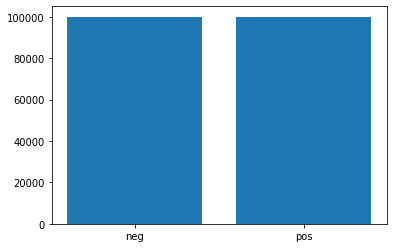

In [0]:
plt.bar(tweet_df['polarity'].unique(),tweet_df['polarity'].value_counts())

### 2. IMDB movie review dataset
This dataset has 100,000 movie reviews which are being labelled as positive or negative review. Source: https://www.kaggle.com/utathya/imdb-review-dataset

In [0]:
imdb_df = pd.read_csv('/content/gdrive/My Drive/Dataset/imdb.csv', 
                      encoding='iso-8859-1')
imdb_df

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...,...
99995,99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup,9998_0.txt
99996,99996,train,"Watching Time Chasers, it obvious that it was ...",unsup,9999_0.txt
99997,99997,train,At the beginning we can see members of Troma t...,unsup,999_0.txt
99998,99998,train,"The movie was incredible, ever since I saw it ...",unsup,99_0.txt


In [0]:
imdb_df = imdb_df[(imdb_df['type'] == 'train') & (imdb_df['label'] != 'unsup')]
imdb_df = imdb_df.filter(['review','label'])
imdb_df

,review,label
25000,Story of a man who has unnatural feelings for ...,neg
25001,Airport '77 starts as a brand new luxury 747 p...,neg
25002,This film lacked something I couldn't put my f...,neg
25003,"Sorry everyone,,, I know this is supposed to b...",neg
25004,When I was little my parents took me along to ...,neg
...,...,...
49995,"Seeing as the vote average was pretty low, and...",pos
49996,"The plot had some wretched, unbelievable twist...",pos
49997,I am amazed at how this movie(and most others ...,pos
49998,A Christmas Together actually came before my t...,pos


<BarContainer object of 2 artists>

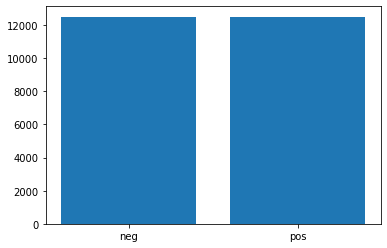

In [0]:
plt.bar(imdb_df['label'].unique(),imdb_df['label'].value_counts())

### 3. Amazon's Products review dataset

This is a list of over 160,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating and review text. Source: https://www.kaggle.com/harshaiitj08/amazon-product-ratings


In [0]:
amz_df = pd.read_csv('/content/gdrive/My Drive/Dataset/amazon.csv')
amz_df

,Unnamed: 0,reviews,ratings
0,0,I like the item pricing. My granddaughter want...,5.0
1,1,Love the magnet easel... great for moving to d...,4.0
2,2,Both sides are magnetic. A real plus when you...,5.0
3,3,Bought one a few years ago for my daughter and...,5.0
4,4,I have a stainless steel refrigerator therefor...,4.0
...,...,...,...
167592,167592,This drone is very fun and super duarable. Its...,5.0
167593,167593,This is my brother's most prized toy. It's ext...,5.0
167594,167594,This Panther Drone toy is awesome. I definitel...,5.0
167595,167595,This is my first drone and it has proven to be...,5.0


In [0]:
amz_df = amz_df.dropna()
amz1_df = amz_df.query("ratings == 1").head(4500)
amz2_df = amz_df.query("ratings == 2").head(4500)
amz3_df = amz_df.query("ratings == 3").head(4500)
amz4_df = amz_df.query("ratings == 4").head(4500)
amz5_df = amz_df.query("ratings == 5").head(4500)
amz_df = pd.concat([amz1_df, amz2_df, amz3_df, amz4_df, amz5_df])
amz_df = amz_df.filter(['reviews','ratings'])
amz_df

,reviews,ratings
157,A crappy cardboard ghost of the original. Har...,1.0
165,We have this same game but it was made in 1967...,1.0
186,Hated this product.Predictable. Not fun. It ...,1.0
191,"I had high hopes for this game, as I am a big ...",1.0
298,thought this was a book with pages to illustra...,1.0
...,...,...
6884,My 3 & 4 y/o love this puzzle. There is enoug...,5.0
6887,my 4 year old got this last year and still lov...,5.0
6888,This puzzle is very well made. The pieces are...,5.0
6889,We love the Melissa and Doug line. We have abo...,5.0


<BarContainer object of 5 artists>

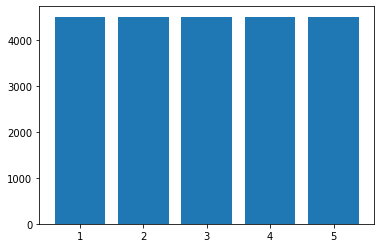

In [0]:
plt.bar(amz_df['ratings'].unique(),amz_df['ratings'].value_counts())

## Cleaning and Pre-processing Data 
### A) Remove punctuation, number & lowercase the text
### 1. Twitter dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['text'] = tweet_df['text'].apply(lambda x: clean(x))
tweet_df.head(20)

,text,polarity
0,switchfoot httptwitpiccomyzl awww thats a bum...,neg
1,is upset that he cant update his facebook by t...,neg
2,kenichan i dived many times for the ball manag...,neg
3,my whole body feels itchy and like its on fire,neg
4,nationwideclass no its not behaving at all im ...,neg
5,kwesidei not the whole crew,neg
6,need a hug,neg
7,loltrish hey long time no see yes rains a bit...,neg
8,tatianak nope they didnt have it,neg
9,twittera que me muera,neg


### 2. IMDB movie review dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

imdb_df['review'] = imdb_df['review'].apply(lambda x: clean(x))
imdb_df.head(20)

,review,label
25000,story of a man who has unnatural feelings for ...,neg
25001,airport starts as a brand new luxury plane i...,neg
25002,this film lacked something i couldnt put my fi...,neg
25003,sorry everyone i know this is supposed to be a...,neg
25004,when i was little my parents took me along to ...,neg
25005,it appears that many critics find the idea of ...,neg
25006,the second attempt by a new york intellectual ...,neg
25007,i dont know who to blame the timid writers or ...,neg
25008,this film is mediocre at best angie harmon is ...,neg
25009,the film is bad there is no other way to say i...,neg


### 3. Amazon's Product review dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

amz_df['reviews'] = amz_df['reviews'].apply(lambda x: clean(x))
amz_df.head(20)

,reviews,ratings
157,a crappy cardboard ghost of the original hard...,1.0
165,we have this same game but it was made in we ...,1.0
186,hated this productpredictable not fun it att...,1.0
191,i had high hopes for this game as i am a big f...,1.0
298,thought this was a book with pages to illustra...,1.0
330,started out as a great road trip activity for ...,1.0
534,it didnt work when we bought it a bummer becau...,1.0
586,heres a creepy little elf and a book if you w...,1.0
730,this game looked like fun but after trying it ...,1.0
742,it took forever for me to write this review si...,1.0


## B) Count vectorizer
The vectorizer shows the frequecy of a term t occurs in a document d. 
### 1. Twitter dataset

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(tweet_df["text"]).toarray()
tweet_count_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
tweet_count_vector_df

,day,dont,going,good,got,home,im,just,know,like,lol,love,new,night,really,think,time,today,want,work
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
199996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


###  2. IMDB movie review dataset

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words="english",
                             max_features=20)
vector = vectorizer.fit_transform(imdb_df["review"]).toarray()
imdb_count_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
imdb_count_vector_df

,bad,br,br br,characters,dont,film,films,good,great,just,like,make,movie,movies,people,really,story,think,time,way
0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,0
1,1,4,0,2,1,3,3,1,3,4,2,0,0,0,0,0,0,1,4,0
2,0,2,0,0,2,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,2,0,0,0,0,3,1,1,1,1,0
4,0,0,0,2,0,5,0,0,0,4,1,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,3,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
24996,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
24997,1,5,0,0,1,0,0,1,1,1,0,0,7,5,1,0,1,0,0,1
24998,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### 3. Amazon's Products review dataset

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(amz_df["reviews"]).toarray()
amz_count_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
amz_count_vector_df

,daughter,dont,fun,game,good,got,great,just,kids,like,little,old,play,really,son,time,toy,use,year,year old
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,2,0,1,1,2,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,8,0,0,0,1,0,1,0,0,1,2,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22496,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,1
22497,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1
22498,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0


## D) TF-IDF vectorizer

1. Term Frequency (TF)

  The frequency of a word **w** appears in a document divided by the total number of words in the document. Every document has its own term frequency.

  ![alt text](https://miro.medium.com/proxy/1*HM0Vcdrx2RApOyjp_ZeW_Q.png)

2. Inverse Data Frequency (IDF)

  The log of the number of documents divided by the number of documents that  contain the word **w**. IDF determines the weight of rare words across all documents in the corpus.

  ![alt text](https://miro.medium.com/proxy/1*A5YGwFpcTd0YTCdgoiHFUw.png)

  Eg: Assume we have 1000 documents and the word 'the' appears 1000 times while 'python' appears 500 times across all the documents and the IDF score will penalise the common words.
  
  idf(the) = log(1000/1000) = 0
  
  idf(python) = log(1000/500) = 0.301


---


  The TF-IDF vectorizer is simply the TF multiplied by IDF. The TF-IDF score increases with number of occurrences within a document and rarity of terms in the collection of documents.

![alt text](https://miro.medium.com/proxy/1*nSqHXwOIJ2fa_EFLTh5KYw.png)

Reference: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

### 1. Twitter dataset

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(tweet_df['text']).toarray()
tweet_tfidf_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
tweet_tfidf_vector_df

,day,dont,going,good,got,home,im,just,know,like,lol,love,new,night,really,think,time,today,want,work
0,0.671002,0.0,0.0,0.0,0.741456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 2. IMDB movie review dataset

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(imdb_df['review']).toarray()
imdb_tfidf_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
imdb_tfidf_vector_df

,bad,br,br br,characters,dont,film,films,good,great,just,like,make,movie,movies,people,really,story,think,time,way
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.335162,0.405050,0.316614,0.000000,0.412560,0.000000,0.000000,0.000000,0.000000,0.375876,0.429411,0.357035,0.000000
1,0.130018,0.322704,0.0,0.270551,0.125055,0.254427,0.410294,0.104034,0.377180,0.393106,0.187491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133288,0.443291,0.000000
2,0.000000,0.430096,0.0,0.000000,0.666688,0.226064,0.000000,0.000000,0.000000,0.523926,0.000000,0.000000,0.211993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.326423,0.000000,0.000000,0.000000,0.378259,0.000000,0.000000,0.000000,0.000000,0.734474,0.221856,0.224530,0.256509,0.213275,0.000000
4,0.000000,0.000000,0.0,0.394546,0.000000,0.618386,0.000000,0.000000,0.000000,0.573268,0.136709,0.186747,0.115979,0.193218,0.000000,0.000000,0.170142,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.000000,0.707811,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.367688,0.287410,0.274159,0.000000,0.232585,0.000000,0.000000,0.000000,0.000000,0.389802,0.000000,0.000000
24996,0.000000,0.634500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.772923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24997,0.128307,0.398070,0.0,0.000000,0.123409,0.000000,0.000000,0.102664,0.124072,0.096983,0.000000,0.000000,0.549381,0.653754,0.125542,0.000000,0.115136,0.000000,0.000000,0.127580
24998,0.000000,0.000000,0.0,0.000000,0.652705,0.000000,0.000000,0.000000,0.000000,0.000000,0.489289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.578422,0.000000


### 3. Amazon's Products review dataset

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(amz_df['reviews']).toarray()
amz_tfidf_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
amz_tfidf_vector_df

,daughter,dont,fun,game,good,got,great,just,kids,like,little,old,play,really,son,time,toy,use,year,year old
0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.586391,0.000000,0.00000,0.0,0.487461,0.000000,0.253213,0.283729,0.523363,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.372708,0.395595,0.000000,0.00000,0.0,0.328855,0.000000,0.683298,0.000000,0.000000,0.359934,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.948393,0.000000,0.00000,0.0,0.098549,0.000000,0.102383,0.000000,0.000000,0.107862,0.226104,0.00000,0.0,0.0,0.132661,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.648411,0.000000,0.000000,0.76129,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
22496,0.0,0.0,0.000000,0.000000,0.000000,0.39742,0.0,0.000000,0.000000,0.000000,0.000000,0.328740,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.753432,0.407833
22497,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.423438,0.358947,0.402205,0.370951,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.425087,0.460200
22498,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.524964,0.445010,0.498640,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.527008,0.000000




---


# TextBlob

TextBlob is built based on NLTK and Pattern. It has great API for all the common NLP operations. It’s great for initial prototyping in almost every NLP project. Unfortunately, it inherits the low performance from NLTK and therefore it’s not good for large scale production usage. 


### Functionalities:

1. Tokenization
2. Parts Of Speech Tagging (POS) 
3. Name Entity Recognition (NER)
4. Classification 
5. Sentiment analysis

Sentiment analysis using TextBlob will result two sentiment metrics, which are: 
1. Polarity 

    lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement    
2. Subjectivity 

    lies in the range of [0,1] where 0 indicates as factual information ans 1 indicates as personal opinion

Example: 

* Towards Data Science is a great platform to learn data science.
    
    Sentiment(polarity=0.8, subjectivity=0.75)

* We can see that polarity is 0.8, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a personal opinion and not a factual information. We can say it's a positive and subjective statement.

### Pros:

1. easy to learn and offers a lot of features like sentiment analysis, pos-tagging, noun phrase extraction etc

2. provides language translation and detection which is powered by Google Translate

3. does not require training process to predict sentiment of text, more efficient in some extent

### Cons:

1. slow in performance when dealing with huge amount of data (more than 100k)

2. does not recognise the context of data, hence the result generated are usually less accurate compared to other custom trained model (Eg: Logistic Regression, Naive Bayes etc)

For more details, kindly refer to Textblob documentation https://textblob.readthedocs.io/en/dev/

Reference: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/) 



In [0]:
#Example for Textblob language translation
from textblob import TextBlob
TextBlob('你在做什么？').translate(from_lang='zh-CN', to ='en')

TextBlob("what are you doing?")

### 1. Twitter dataset

In [0]:
tweet_df['textblob_polarity'] = tweet_df.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)

i = 0
predicted_value = [ ] 
while i < len(tweet_df):
    if ((tweet_df.iloc[i]['textblob_polarity'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((tweet_df.iloc[i]['textblob_polarity'] < 0)):
        predicted_value.append('neg')
        i = i+1
tweet_df['textblob_predicted'] = predicted_value

tweet_df['textblob_subjectivity'] = tweet_df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)       
tweet_df

,text,polarity,textblob_polarity,textblob_predicted,textblob_subjectivity
0,switchfoot httptwitpiccomyzl awww thats a bum...,neg,0.2000,pos,0.4500
1,is upset that he cant update his facebook by t...,neg,0.0000,pos,0.0000
2,kenichan i dived many times for the ball manag...,neg,0.5000,pos,0.5000
3,my whole body feels itchy and like its on fire,neg,0.2000,pos,0.4000
4,nationwideclass no its not behaving at all im ...,neg,-0.6250,neg,1.0000
...,...,...,...,...,...
1599995,just woke up having no school is the best feel...,pos,1.0000,pos,0.3000
1599996,thewdbcom very cool to hear old walt intervie...,pos,0.2775,pos,0.5225
1599997,are you ready for your mojo makeover ask me fo...,pos,0.2000,pos,0.5000
1599998,happy th birthday to my boo of alll time tupac...,pos,0.8000,pos,1.0000


In [0]:
from sklearn.metrics import f1_score,accuracy_score
m1 = f1_score(tweet_df['polarity'], tweet_df['textblob_predicted'], pos_label='pos')
m2 = accuracy_score(tweet_df['polarity'], tweet_df['textblob_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.6920631466036549
Accuracy score: 0.60383


We can observe that TextBlob doesn't work well with Twitter dataset as the F1 score and accuracy score are 0.692 and 0.604 respectively, which are belowe 0.7. This shows results generated by TextBlob are less in terms of accuracy.

---

### 2. IMDB movie review

In [0]:
imdb_df['textblob_polarity'] = imdb_df.apply(lambda x: TextBlob(x['review']).sentiment.polarity, axis=1)

i = 0
predicted_value = [ ] 
while i < len(imdb_df):
    if ((imdb_df.iloc[i]['textblob_polarity'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((imdb_df.iloc[i]['textblob_polarity'] < 0)):
        predicted_value.append('neg')
        i = i+1        
imdb_df['textblob_predicted'] = predicted_value

imdb_df['textblob_subjectivity'] = imdb_df.apply(lambda x: TextBlob(x['review']).sentiment.subjectivity, axis=1)
imdb_df

,review,label,textblob_polarity,textblob_predicted,textblob_subjectivity
25000,story of a man who has unnatural feelings for ...,neg,-0.071759,neg,0.620370
25001,airport starts as a brand new luxury plane i...,neg,0.040492,pos,0.499230
25002,this film lacked something i couldnt put my fi...,neg,0.079167,pos,0.527778
25003,sorry everyone i know this is supposed to be a...,neg,0.043542,pos,0.647083
25004,when i was little my parents took me along to ...,neg,-0.055741,neg,0.557328
...,...,...,...,...,...
49995,seeing as the vote average was pretty low and ...,pos,0.291961,pos,0.563529
49996,the plot had some wretched unbelievable twists...,pos,0.250000,pos,0.600000
49997,i am amazed at how this movieand most others h...,pos,0.136099,pos,0.645995
49998,a christmas together actually came before my t...,pos,0.118069,pos,0.461614


In [0]:
m1 = f1_score(imdb_df['label'], imdb_df['textblob_predicted'], pos_label='pos')
m2 = accuracy_score(imdb_df['label'], imdb_df['textblob_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7515891177218408
Accuracy score: 0.68736


The performance of TextBlob in movie review dataset is slightly better than Twitter dataset as the F1 score and accuracy score are 0.752 and 0.687 respectively, which one of the measure exceeds 0.7 . Besides, we can notice that most of the reviews produce subjectivity score that exceeds 0.5, indicating they are fairly subjective statement.

---

### 3. Amazon's Products review dataset

In [0]:
amz_df['textblob_polarity'] = amz_df.apply(lambda x: TextBlob(x['reviews']).sentiment.polarity, axis=1)

i = 0
predicted_value = [ ] 
while i < len(amz_df):
    if ((amz_df.iloc[i]['textblob_polarity'] > 0.6)):
        predicted_value.append(5.0)
        i = i+1
    elif ((amz_df.iloc[i]['textblob_polarity'] <= 0.6 and amz_df.iloc[i]['textblob_polarity'] > 0.2)):
        predicted_value.append(4.0)
        i = i+1 
    elif ((amz_df.iloc[i]['textblob_polarity'] <= 0.2 and amz_df.iloc[i]['textblob_polarity'] > -0.2)):
        predicted_value.append(3.0)
        i = i+1
    elif ((amz_df.iloc[i]['textblob_polarity'] <= -0.2 and amz_df.iloc[i]['textblob_polarity']> -0.6)):
        predicted_value.append(2.0)
        i = i+1
    elif ((amz_df.iloc[i]['textblob_polarity'] <= -0.6)):
        predicted_value.append(1.0)
        i = i+1         
amz_df['textblob_predicted'] = predicted_value

amz_df['textblob_subjectivity'] = amz_df.apply(lambda x: TextBlob(x['reviews']).sentiment.subjectivity, axis=1)
amz_df

,reviews,ratings,textblob_polarity,textblob_predicted,textblob_subjectivity
157,a crappy cardboard ghost of the original hard...,1.0,-0.305556,2.0,0.763889
165,we have this same game but it was made in we ...,1.0,0.081389,3.0,0.415000
186,hated this productpredictable not fun it att...,1.0,-0.194792,3.0,0.463542
191,i had high hopes for this game as i am a big f...,1.0,-0.024593,3.0,0.419584
298,thought this was a book with pages to illustra...,1.0,-0.189231,3.0,0.344808
...,...,...,...,...,...
6884,my yo love this puzzle there is enough of ...,5.0,0.210000,4.0,0.566667
6887,my year old got this last year and still love...,5.0,0.204167,4.0,0.412500
6888,this puzzle is very well made the pieces are ...,5.0,0.177546,3.0,0.531812
6889,we love the melissa and doug line we have abou...,5.0,0.219123,4.0,0.506364


In [0]:
m1 = f1_score(amz_df['ratings'], amz_df['textblob_predicted'], average='macro')
m2 = accuracy_score(amz_df['ratings'], amz_df['textblob_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.15556798102787572
Accuracy score: 0.22924444444444445


In conclusion, TextBlob shines if your intention is having a quick prediction on the sentiment of documents but be awared that the accuracy is lower compared to custom trained model like Logistic Regression. 


---


# VADER 

Widely used in analyzing sentiment on social media text because it has been specifically attuned to analyze sentiments expressed in social media (Eg: Twitter, Facebook etc)

VADER produces four sentiment metrics:
 1. positive
 2. neutral 
 3. negative 
 4. compound
 
The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories. 

The compound score is a normalized score of **sum_s** and
**sum_s** is the sum of the valence score computed based on pre-defined sentiment lexicon (aka Sentiment Intensity) and
the normalized score is simply the **sum_s** divided by square root of  its square plus an alpha parameter (a hyperparameter).

> norm(sum_s) = sum_s / sqrt(sum_s*sum_s + alpha)
 

## Pros
1. Among the most comprehensive tools for social media analysis 

2. Easy to use and does not require training process

##  Cons
1. Not accurate when dealing when longer text and complex data

2. Does not recognize context of the datasets, hence the result generated are less accurate when dealing with datasets 

Reference: 
1. https://www.kaggle.com/nikhilsable/sentiment-using-airline-tweets-using-vader

2. http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

### 1. Twitter dataset

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
i = 0
comp_value = []
while i < len(tweet_df):
    k = analyser.polarity_scores(tweet_df.iloc[i]['text'])
    comp_value.append(k['compound'])
    i += 1
    
comp_value = np.array(comp_value)
tweet_df['Vader_score'] = comp_value

i = 0
predicted_value = [ ] 
while i < len(tweet_df):
    if ((tweet_df.iloc[i]['Vader_score'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((tweet_df.iloc[i]['Vader_score'] < 0)):
        predicted_value.append('neg')
        i = i+1
        
tweet_df['Vader_predicted'] = predicted_value
tweet_df

     |████████████████████████████████| 133kB 2.8MB/s 


,text,polarity,textblob_polarity,textblob_predicted,textblob_subjectivity,Vader_score,Vader_predicted
0,switchfoot httptwitpiccomyzl awww thats a bum...,neg,0.2000,pos,0.4500,-0.3818,neg
1,is upset that he cant update his facebook by t...,neg,0.0000,pos,0.0000,-0.7269,neg
2,kenichan i dived many times for the ball manag...,neg,0.5000,pos,0.5000,0.4939,pos
3,my whole body feels itchy and like its on fire,neg,0.2000,pos,0.4000,-0.2500,neg
4,nationwideclass no its not behaving at all im ...,neg,-0.6250,neg,1.0000,-0.6597,neg
...,...,...,...,...,...,...,...
1599995,just woke up having no school is the best feel...,pos,1.0000,pos,0.3000,0.5423,pos
1599996,thewdbcom very cool to hear old walt intervie...,pos,0.2775,pos,0.5225,0.3804,pos
1599997,are you ready for your mojo makeover ask me fo...,pos,0.2000,pos,0.5000,0.3612,pos
1599998,happy th birthday to my boo of alll time tupac...,pos,0.8000,pos,1.0000,0.5719,pos


In [0]:
m1 = f1_score(tweet_df['polarity'], tweet_df['Vader_predicted'], pos_label='pos')
m2 = accuracy_score(tweet_df['polarity'], tweet_df['Vader_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7211264630247287
Accuracy score: 0.656775


VADER is doing well in predicting the sentiment for Twitter dataset as the F1 score and accuracy score are 0.721 and 0.657 respectively, which are better than the result produced by TextBlob. This proves that VADER is better in analysing social media text than TextBlob.

---

### 2. IMDB movie review dataset


In [0]:
analyser = SentimentIntensityAnalyzer()
i = 0
comp_value = []
while i < len(imdb_df):
    k = analyser.polarity_scores(imdb_df.iloc[i]['review'])
    comp_value.append(k['compound'])
    i += 1
    
comp_value = np.array(comp_value)
imdb_df['Vader_score'] = comp_value

i = 0
predicted_value = [ ] 
while i < len(imdb_df):
    if ((imdb_df.iloc[i]['Vader_score'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((imdb_df.iloc[i]['Vader_score'] < 0)):
        predicted_value.append('neg')
        i = i+1
        
imdb_df['Vader_predicted'] = predicted_value
imdb_df

,review,label,textblob_polarity,textblob_predicted,textblob_subjectivity,Vader_score,Vader_predicted
25000,story of a man who has unnatural feelings for ...,neg,-0.071759,neg,0.620370,0.7003,pos
25001,airport starts as a brand new luxury plane i...,neg,0.040492,pos,0.499230,-0.9657,neg
25002,this film lacked something i couldnt put my fi...,neg,0.079167,pos,0.527778,0.8936,pos
25003,sorry everyone i know this is supposed to be a...,neg,0.043542,pos,0.647083,0.8684,pos
25004,when i was little my parents took me along to ...,neg,-0.055741,neg,0.557328,-0.9757,neg
...,...,...,...,...,...,...,...
49995,seeing as the vote average was pretty low and ...,pos,0.291961,pos,0.563529,0.9925,pos
49996,the plot had some wretched unbelievable twists...,pos,0.250000,pos,0.600000,0.8934,pos
49997,i am amazed at how this movieand most others h...,pos,0.136099,pos,0.645995,0.9594,pos
49998,a christmas together actually came before my t...,pos,0.118069,pos,0.461614,0.9865,pos


In [0]:
m1 = f1_score(imdb_df['label'], imdb_df['Vader_predicted'], pos_label='pos')
m2 = accuracy_score(imdb_df['label'], imdb_df['Vader_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7342437337942956
Accuracy score: 0.69252


Different scenario happens here as the result generated by VADER for this dataset (F1 score: 0.734 and accuracy score: 0.693) are less accurate compared to TextBlob, this maybe due to VADER is weak in handling longer and more complex text.

---

### 3. Amazon's Products review dataset

In [0]:
analyser = SentimentIntensityAnalyzer()
i = 0
comp_value = []
while i < len(amz_df):
    k = analyser.polarity_scores(amz_df.iloc[i]['reviews'])
    comp_value.append(k['compound'])
    i += 1
    
comp_value = np.array(comp_value)
amz_df['Vader_score'] = comp_value

i = 0
predicted_value = [ ] 
while i < len(amz_df):
    if ((amz_df.iloc[i]['Vader_score'] > 0.6)):
        predicted_value.append(5.0)
        i = i+1
    elif ((amz_df.iloc[i]['Vader_score'] <= 0.6 and amz_df.iloc[i]['Vader_score'] > 0.2)):
        predicted_value.append(4.0)
        i = i+1 
    elif ((amz_df.iloc[i]['Vader_score'] <= 0.2 and amz_df.iloc[i]['Vader_score'] > -0.2)):
        predicted_value.append(3.0)
        i = i+1
    elif ((amz_df.iloc[i]['Vader_score'] <= -0.2 and amz_df.iloc[i]['Vader_score']> -0.6)):
        predicted_value.append(2.0)
        i = i+1
    elif ((amz_df.iloc[i]['Vader_score'] <= -0.6)):
        predicted_value.append(1.0)
        i = i+1         
amz_df['Vader_predicted'] = predicted_value
amz_df

,reviews,ratings,textblob_polarity,textblob_predicted,textblob_subjectivity,Vader_score,Vader_predicted
157,a crappy cardboard ghost of the original hard...,1.0,-0.305556,2.0,0.763889,-0.9052,1.0
165,we have this same game but it was made in we ...,1.0,0.081389,3.0,0.415000,0.7964,5.0
186,hated this productpredictable not fun it att...,1.0,-0.194792,3.0,0.463542,-0.1205,3.0
191,i had high hopes for this game as i am a big f...,1.0,-0.024593,3.0,0.419584,0.9607,5.0
298,thought this was a book with pages to illustra...,1.0,-0.189231,3.0,0.344808,-0.9230,1.0
...,...,...,...,...,...,...,...
6884,my yo love this puzzle there is enough of ...,5.0,0.210000,4.0,0.566667,0.4118,4.0
6887,my year old got this last year and still love...,5.0,0.204167,4.0,0.412500,0.8689,5.0
6888,this puzzle is very well made the pieces are ...,5.0,0.177546,3.0,0.531812,0.9894,5.0
6889,we love the melissa and doug line we have abou...,5.0,0.219123,4.0,0.506364,0.8573,5.0


In [0]:
m1 = f1_score(amz_df['ratings'], amz_df['Vader_predicted'], average='macro')
m2 = accuracy_score(amz_df['ratings'], amz_df['Vader_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.23950762351467847
Accuracy score: 0.2876444444444444


Again, the result produced by VADER for this dataset is almost the same situation as the second dataset, where it's less accurate compared to using TextBlob. In short, VADER really shines in analysing social media text like the Twitter dataset. However, VADER don't do well in handling longer text and complex sentence like in the movie review dataset.


---


# Logistic Regression

## Why not Linear Regression?
    
Linear regression is unbounded as the predicted value (output) can exceed 0 and 1 range. This brings logistic regression into picture as their ouput value strictly ranges from 0 to 1, which is suitable for classification problem.

![alt text](https://miro.medium.com/max/2900/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg)


---

## What is Logistic Regression?

Logistic regression is a classification algorithm used to assign observations (input) to a discrete set of classes (often in binary). Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. 

Logistic regression transforms its output using the logistic sigmoid function to return a probability value. Sigmoid function maps any real value into another value between 0 and 1, just like probability. 
![alt text](https://miro.medium.com/max/800/1*OUOB_YF41M-O4GgZH_F2rw.png)

## Formula of sigmoid function

![alt text](https://miro.medium.com/max/339/1*Gp5E23P5d2PY5D5kOo8ePw.png)


---


## How sigmoid function is derived though?

It is derived from the log(odds) function, log [p/(1-p)].

Odds is defined as probability of success/probability of failure. So the odds of a success (80% chance of rain) has an accompanying odds of failure (20% chance it doesn’t rain); as an equation (the “odds ratio“), that’s .8/.2 = 4. Conversion to log odds results in symmetry around zero, which is easier for analysis.

The name 'logistic regression' can be justified as data is fit into linear regression model, which then applied by a logistic (sigmoid) function to produce binary outcome and predict the target categorical dependent variable.


---


## Pros
1. doesn't require high computation power

2. easy to implement, interpret and very efficient to train. 

## Cons
1. Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world,the data is rarely linearly separable. Most of the time data would be a jumbled mess.

2. If the number of features are less than the number of classes, it 
tends to overfit.

3. will not perform well with independent variables that are not correlated to the target variable


---


## Cross validation

One way to prevent overfitting is to perform cross validation. The idea is to

1. partition your data into training data and testing data (sometimes called validation data); treat testing data as unobserved, and

2. fit your model using only the training data.

3. evaluate your model on the testing data that you held out earlier, compare with the actual results, and obtain a testing error.

Repeat the process K times then take average of the testing errors as a final performance measure.

Reference:
1. https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a

2. https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

3. https://machinelearningmastery.com/logistic-regression-for-machine-learning/

### 1. Twitter dataset


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

#using n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(tweet_df["text"])
X = ngram_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.750875
Accuracy for C=0.05: 0.770025
Accuracy for C=0.25: 0.77995
Accuracy for C=0.5: 0.78075
Accuracy for C=1: 0.780975


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1,3),
                                stop_words="english")
wc_vectorizer.fit(tweet_df["text"])
X = wc_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.757575
Accuracy for C=0.05: 0.7716
Accuracy for C=0.25: 0.780525
Accuracy for C=0.5: 0.782025
Accuracy for C=1: 0.78225


In [0]:
#using tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),
                                   stop_words='english')
tfidf_vectorizer.fit(tweet_df["text"])
X = tfidf_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.7248
Accuracy for C=0.05: 0.740175
Accuracy for C=0.25: 0.7606
Accuracy for C=0.5: 0.768975
Accuracy for C=1: 0.7742


For Twitter dataset, the best accuracy score falls around the value of 0.78 for different pre-processing methods used and count vectorizer works better in this case. Another thing to take note is that the accuracy score is higher compared to using TextBlob and VADER.

---

### 2. IMDB movie review dataset

In [0]:
#using n-grams only
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(imdb_df["review"])
X = ngram_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.871
Accuracy for C=0.05: 0.8758
Accuracy for C=0.25: 0.8788
Accuracy for C=0.5: 0.879
Accuracy for C=1: 0.8796


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words="english")
wc_vectorizer.fit(imdb_df["review"])
X = wc_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8, )

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8806
Accuracy for C=0.05: 0.8856
Accuracy for C=0.25: 0.8886
Accuracy for C=0.5: 0.8878
Accuracy for C=1: 0.8878


In [0]:
#using tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                   stop_words='english')
tfidf_vectorizer.fit(imdb_df["review"])
X = tfidf_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8, )

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.79
Accuracy for C=0.05: 0.8116
Accuracy for C=0.25: 0.8396
Accuracy for C=0.5: 0.855
Accuracy for C=1: 0.8664


Logistic regression works quite well for movie review dataset as the accuracy score is within the range of 0.87 and 0.89 for different pre-processing methods used and again, count vectorizer works best in this case.

---

### 3. Amazon's Products review dataset

In [0]:
#using n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(amz_df["reviews"])
X = ngram_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000, multi_class='multinomial')
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.4915555555555556
Accuracy for C=0.05: 0.5068888888888889
Accuracy for C=0.25: 0.5008888888888889
Accuracy for C=0.5: 0.49822222222222223
Accuracy for C=1: 0.49644444444444447


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words="english")
wc_vectorizer.fit(amz_df["reviews"])
X = wc_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.4948888888888889
Accuracy for C=0.05: 0.5044444444444445
Accuracy for C=0.25: 0.5035555555555555
Accuracy for C=0.5: 0.5024444444444445
Accuracy for C=1: 0.49977777777777777


In [0]:
#using tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                   stop_words='english')
tfidf_vectorizer.fit(amz_df["reviews"])
X = tfidf_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.4448888888888889
Accuracy for C=0.05: 0.46111111111111114
Accuracy for C=0.25: 0.484
Accuracy for C=0.5: 0.494
Accuracy for C=1: 0.504


Logistic regression don't do well in predicting the sentiment of this dataset with just getting accuracy score of around 0.50. However, it's doing significantly better than TextBlob and Vader (0.23 and 0.29 respectively)


---


# Naive Bayes
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. This theorem provides a way of calculating a type or probability called posterior probability, in which the probability of a event A (like the review is positive/negative) occurring is reliant on probabilistic known background (e.g. event B evidence).

![alt text](https://miro.medium.com/max/918/1*LB-G6WBuswEfpg20FMighA.png)

## But why is it called ‘Naive’?

Naive Bayes classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. In real datasets, we test a hypothesis given multiple evidence(feature). So, calculations become complicated. To simplify the work, the feature independence approach is used to ‘uncouple’ multiple evidence and treat each as an independent one.


---


## How Naive Bayes works?

![alt text](https://drive.google.com/uc?id=1QR2fjZtuVEyYhDllWTt3U-PS4qnc2CFd)


---


## Pros
1. easy and fast to predict class of test data set. It is also a highly scalable algorithm.

2. can be used for Binary and Multiclass classification

3. performs better compare to other models like logistic regression and you need less training data (p.s: if the assumption of independence holds)

4. perform well in case of categorical input variables compared to numerical variable(s)

## Cons
1. If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency" (p.s: can be solved by smoothing technique, such as Laplace smoothing, basically add 1 to every count so it’s never zero)

2. Naive Bayes is based on the asssumption of the independence of predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

3. Naive Bayes can learn individual features importance but can’t determine the relationship among features.

Reference: 
1. https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/

2. https://levelup.gitconnected.com/movie-review-sentiment-analysis-with-naive-bayes-machine-learning-from-scratch-part-v-7bb869391bab

### 1. Twitter dataset



In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,accuracy_score

wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words='english')
wc_vectorizer.fit(tweet_df["text"])
X = wc_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7604726100966702
Accuracy score: 0.771425


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
tfidf_vectorizer.fit(tweet_df["text"])
X = tfidf_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7645965821360341
Accuracy score: 0.775125


Naive Bayes is getting around the same accuracy with Logistic Regression with the accuracy score around 0.77 and TF-IDF works better in this case.

---

### 2. IMDB movie review dataset


In [0]:
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words='english')
wc_vectorizer.fit(imdb_df["review"])
X = wc_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.8666114333057168
Accuracy score: 0.8712


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                  stop_words='english')
tfidf_vectorizer.fit(imdb_df["review"])
X = tfidf_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.878323932312651
Accuracy score: 0.8792


As the same as the first dataset, Naive Bayes achieces almost the same accuracy as Logistic Regression with accuracy score of 0.88 and TF-IDF works better in this case too.


---


### 3. Amazon's Products review dataset

In [0]:
from sklearn.naive_bayes import MultinomialNB

wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words='english')
wc_vectorizer.fit(amz_df["reviews"])
X = wc_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, average='macro')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.46494102319457725
Accuracy score: 0.46555555555555556


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),
                                   stop_words='english')
tfidf_vectorizer.fit(amz_df["reviews"])
X = tfidf_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, average='macro')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.49659489818015884
Accuracy score: 0.506


In conclusion, the accuracy of Naive Bayes are almost the same as Logistic Regression in three of the datasets. One thing to notice is that Naive Bayes tends to work better with TF-IDF than count vectorizer. 


---


# Support Vector Machine (SVM)

## What is Support Vector Machine?

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

![alt text](https://miro.medium.com/max/375/0*9jEWNXTAao7phK-5.png)
![alt text](https://miro.medium.com/max/375/0*0o8xIA4k3gXUDCFU.png)


---


## What is hyperplane?

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


![alt text](https://miro.medium.com/max/944/0*ecA4Ls8kBYSM5nza.jpg)

## What is support vectors?

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

## Pros:

1. It is effective and accurate in the higher dimensional spaces.

2. Effective when the number of features are more than training samples, thus works well in small  datasets. (still prone to overfitting, if number of features is much greater than the number of samples)

## Cons:

1. SVMs are not very efficient computationally, thus if your dataset is very big, it takes large amount of time to process.

2. Less effective on noisier datasets with overlapping classes.

Reference:
1. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

2. https://towardsdatascience.com/support-vector-machines-svm-c9ef228

### 1. Twitter dataset

In [0]:
from sklearn.svm import LinearSVC

#using SVM model
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
ngram_vectorizer.fit(tweet_df["text"])
X = ngram_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:   
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.777925
Accuracy for C=0.05: 0.784075
Accuracy for C=0.25: 0.78105
Accuracy for C=0.5: 0.77915
Accuracy for C=1: 0.774025


### 2. IMDB movie review dataset

In [0]:
#using SVM model
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
ngram_vectorizer.fit(imdb_df["review"])
X = ngram_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:   
    svm = LinearSVC(C=c, max_iter=3000)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.88432
Accuracy for C=0.05: 0.88304
Accuracy for C=0.25: 0.88288
Accuracy for C=0.5: 0.88256
Accuracy for C=1: 0.88256


### 3. Amazon's Products review dataset

In [0]:
#using SVM model
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
ngram_vectorizer.fit(amz_df["reviews"])
X = ngram_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    svm = LinearSVC(C=c, max_iter=5000)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.5032888888888889
Accuracy for C=0.05: 0.49777777777777776
Accuracy for C=0.25: 0.4912
Accuracy for C=0.5: 0.4885333333333333
Accuracy for C=1: 0.488




---


# Deep Learning Method
Deep learning is an AI function that imitates the workings of the human brain in processing data and creating patterns for use in decision making.

Deep learning, a subset of machine learning, utilizes artificial neural networks to carry out the process of machine learning. The artificial neural networks are built like the human brain, with neuron nodes connected together like a web. While traditional programs build analysis with data in a linear way, the hierarchical function of deep learning systems enables machines to process data with a nonlinear approach.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. There are tons of different neural networks, such as:

1. Feed Forward (FF)

2. Recurrent Neural Network (RNN)

3. Long Short Term Memory (LSTM) 

4. Transformer etc.

Reference: https://www.investopedia.com/terms/d/deep-learning.asp


---


## What is Recurent Neural Network (RNN)?

![alt text](https://miro.medium.com/max/250/1*L38xfe59H5tAgvuIjKoWPg.png)

In the figure above, we see part of the neural network, A, processing some input x_t and outputs h_t. h_t is also known as the hidden state, which preserve short term memory and allows information to be passed from one step to the next. A RNN can be thought of as multiple copies of the same network, A, each network passing a message to a successor as below:

![alt text](https://miro.medium.com/max/3383/1*NKhwsOYNUT5xU7Pyf6Znhg.png)

The following picture shows how usually a sequence to sequence model works using RNNs. Each word is processed separately, and the resulting sentence is generated by passing a hidden state to the decoding stage that, then, generates the output.

![alt text](https://miro.medium.com/max/750/1*8GcdjBU5TAP36itWBcZ6iA.gif)

## The inside of RNNs:

![alt text](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png)
In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.


---


## What is the problem with RNN?

RNNs become very ineffective when the gap between the relevant information and the point where it is needed become very large. That is due to the fact that the information is passed at each step and the longer the chain is, the more probable the information is lost along the chain.

For example,  let’s say that you are trying to predict the last word of the text: “I grew up in France… I speak fluent …”. Recent information suggests that the next word is probably a language, but if we want to narrow down which language, we need context of France, that is further back in the text. Thus, RNN can't predict well when the information gap is too big. 

![alt text](https://miro.medium.com/max/3154/1*a5EbLhyxbPR78PhiV5Esjg.png)

This common problem with RNN in which RNN can't handle long term dependecies well is due to vanishing gradient. Basically it means your gradient are getting lower and lower each time you propagate back to minimise your error and update your weight. The information being passed down are lost along the chain. For detailed explaination, click [here](https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-the-vanishing-gradient-problem). The invention  of Long-Short Term Memory (LSTM) network greatly addressed to this issue faced by RNN.


---


## What is LSTM?

When arranging one’s calendar for the day, we prioritize our appointments. If there is anything important, we can cancel some of the meetings and accommodate what is important.

RNNs don’t do that. Whenever it adds new information, it transforms existing information completely by applying a function. The entire information is modified, and there is no consideration of what is important and what is not.

LSTMs make small modifications to the information by multiplications and additions. With LSTMs, the information flows through a mechanism known as cell states, which preserve long term memory. In this way, LSTMs can selectively remember or forget things that are important and not so important.

The structure of LSTM is as below:

![alt text](https://miro.medium.com/max/1305/1*MwU5yk8f9d6IcLybvGgNxA.jpeg)

## How LSTM works?

Each cell takes as inputs x_t (a word in the case of a sentence to sentence translation), the previous cell state c_t-1 and the output of the previous cell h_t-1. It manipulates these inputs and based on them through 3 gates (forget gate, input gate and output gate) which function differently. Afterwards, it generates a new cell state c_t, and an output h_t to pass to the next cell.

![alt text](https://drive.google.com/uc?id=14TPKg6sIShWKzKSuXPl1s33s-Ufk86wB)

To have futher insight on how it performs in action, we will look at ULMFit model which utilise the LSTM network.

Reference: 

1. https://towardsdatascience.com/transformers-141e32e69591

2. http://colah.github.io/posts/2015-08-Understanding-LSTMs/






---


# 1. ULMFit

The idea of using generative pretrained LM + task-specific fine-tuning was first explored in ULMFiT (Howard & Ruder, 2018), the base model is AWD-LSTM. 


## ULMFit Model Architecture

The following techniques are applied from the ULMFit paper to achieve better accuracy:

### 1. Discriminative fine-tuning

Motivated by the fact that different layers of LM capture different types of information. ULMFiT proposed to tune each layer with different learning rates, {η1,…,ηℓ,…,ηL}, where η is the base learning rate for the first layer, ηℓ is for the ℓ-th layer and there are L layers in total.


### 2. 1-cycle learning rate policy

Allows a large initial learning rate (LR_{max}=10^{-3}, for example), but decreases it by several orders of magnitude just at the last epoch. This seems to provide greater final accuracy. In the ULMFit implementation, this 1-cycle policy has been tweaked and is referred to as slanted triangular learning rate.


### 3. Gradual unfreezing

Rather than training all the layers at once during classification, the layers are "frozen" and the last layer is fine-tuned first, followed by the next layer before it, and so on. This avoids the phenomenon known as catastrophic forgetting (by fine-tuning all layers too aggressively).


### 4. Concatenated pooling

Because an input text can consist of hundreds or thousands of words, information might get lost if we only consider the last hidden state.

Hence, the hidden state at the last time step, h_T is concatenated with both the max-pooled and mean-pooled representation of the hidden states over as many time steps as can fit in GPU memory.

h_C = [h_T, maxpool(H), meanpool(H)]

Where H is the vector of all hidden states.


---


## 3-stage fine-tuning methodology
The classification task is done in a 3-stage process:

### 1. General-domain LM pretraining: 
ULMFit has a pretrained model generated using an AWD-LSTM to develop a language model called Wikitext-103 and was trained of 28,595 preprocessed Wikipedia articles, totalling to 103 million words.

### 2. Target task LM fine-tuning: 
Since the target data which we are trying to analyse, will likely come from a different distribution, ULMFit allows us to use the pre-trained language model and fine-tune it (using the above techniques) to adapt to the different context of the target data.
    
### 3. Target task classifier fine-tuning: 
Once we save the updated weights from the language model fine-tuning step, we can fine-tune the classifier with gradual unfreezing and the other techniques described above to perform task-specific class prediction.

Reference: 
1. https://github.com/prrao87/tweet-stance-prediction

2. https://docs.fast.ai/

3. https://sgugger.github.io/the-1cycle-policy.html

4. https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

5. https://forums.fast.ai/t/determining-when-you-are-overfitting-underfitting-or-just-right/7732



In [0]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm
!pip3 install fastai
!python3 -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
from fastai import *
from fastai.text import *
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [0]:
path = Path('/content/gdrive/My Drive/Dataset')
trainfile = 'imdb_train.csv'
testfile = 'imdb_test.csv'
train_orig = pd.read_csv(path/trainfile, encoding='iso-8859-1')
train_orig

,Unnamed: 0,type,review,label,file
0,25000,train,Story of a man who has unnatural feelings for ...,neg,0_3.txt
1,25001,train,Airport '77 starts as a brand new luxury 747 p...,neg,10000_4.txt
2,25002,train,This film lacked something I couldn't put my f...,neg,10001_4.txt
3,25003,train,"Sorry everyone,,, I know this is supposed to b...",neg,10002_1.txt
4,25004,train,When I was little my parents took me along to ...,neg,10003_1.txt
...,...,...,...,...,...
24995,49995,train,"Seeing as the vote average was pretty low, and...",pos,9998_9.txt
24996,49996,train,"The plot had some wretched, unbelievable twist...",pos,9999_8.txt
24997,49997,train,I am amazed at how this movie(and most others ...,pos,999_10.txt
24998,49998,train,A Christmas Together actually came before my t...,pos,99_8.txt


In [0]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)
  
train_orig['review'] = train_orig['review'].apply(clean_ascii)
train_orig.head()

,Unnamed: 0,type,review,label,file
0,25000,train,Story of a man who has unnatural feelings for ...,neg,0_3.txt
1,25001,train,Airport '77 starts as a brand new luxury 747 p...,neg,10000_4.txt
2,25002,train,This film lacked something I couldn't put my f...,neg,10001_4.txt
3,25003,train,"Sorry everyone,,, I know this is supposed to b...",neg,10002_1.txt
4,25004,train,When I was little my parents took me along to ...,neg,10003_1.txt


In [0]:
train = pd.concat([train_orig['label'], train_orig['review']], axis=1)
train.tail()

,label,review
24995,pos,"Seeing as the vote average was pretty low, and..."
24996,pos,"The plot had some wretched, unbelievable twist..."
24997,pos,I am amazed at how this movie(and most others ...
24998,pos,A Christmas Together actually came before my t...
24999,pos,Working-class romantic drama from director Mar...


In [0]:
# Write train to csv
train.to_csv(path/'train.csv', index=False, header=False)

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'train.csv', min_freq=1)

In [0]:
# Save the language and classifier model data for re-use
data_lm.save()

In [0]:
data_lm.show_batch()

idx,text
0,"two numbers for the lottery . \n \n xxmaj our star of the picture has his number and his friend his . xxmaj when he asks his friend , would he share half of the dough , should his ticket be the winning number , his friend promptly says no . xxmaj in fact , xxup h.e. double hockey sticks no ! is the way he acts about it"
1,"still investing time in something related to this piece of sh!t is startlingly similar to waking up after a night of suicidally heavy drinking next to the heaving form of a still slumbering 200 pound college girl . xxmaj your first urge is a desperate desire to flee . xxmaj this is natural . xxbos i imagine when xxmaj hitchcock scholars and experts find themselves together , the talk is"
2,"cliche at all the right moments . xxmaj superb xxmaj new xxmaj york xxmaj city locations - gritty , real - are a fantastic antidote to the commercial imperatives of "" xxmaj sex in the xxmaj city "" - in fact , the entire film is an antidote to the xxup hbo / xxmaj hollywood notion of xxmaj new xxmaj york xxmaj city , sex and relationships . xxmaj it"
3,"stooge counterparts a running gag throughout the 53- minute movie is xxmaj moe hitting xxmaj curly . xxmaj wayne 's character , a skirt chasing bully , is not very endearing , but is supposed to be the good guy . \n \n xxmaj playing a traveling rodeo cowboy xxmaj wayne holds up the rodeo box office at gunpoint and takes the prize money he would have won if"
4,"king xxmaj david } , xxmaj susan xxmaj hayward ( xxmaj bathsheba ) , xxmaj raymond xxmaj massey ( xxmaj nathan ) , xxmaj kieron xxmaj moore ( xxmaj uriah ) and xxmaj jayne xxmaj meadows ( xxmaj michal ) . \n \n xxmaj the film is based around the second xxmaj old xxmaj testament book of xxmaj samuel from the xxmaj holy xxmaj bible . xxmaj it follows"


In [0]:
learn = language_model_learner(data_lm, arch = AWD_LSTM, pretrained = True, drop_mult=0.5)

In [0]:
list(learn.model.children())

[AWD_LSTM(
   (encoder): Embedding(60000, 400, padding_idx=1)
   (encoder_dp): EmbeddingDropout(
     (emb): Embedding(60000, 400, padding_idx=1)
   )
   (rnns): ModuleList(
     (0): WeightDropout(
       (module): LSTM(400, 1152, batch_first=True)
     )
     (1): WeightDropout(
       (module): LSTM(1152, 1152, batch_first=True)
     )
     (2): WeightDropout(
       (module): LSTM(1152, 400, batch_first=True)
     )
   )
   (input_dp): RNNDropout()
   (hidden_dps): ModuleList(
     (0): RNNDropout()
     (1): RNNDropout()
     (2): RNNDropout()
   )
 ), LinearDecoder(
   (decoder): Linear(in_features=400, out_features=60000, bias=True)
   (output_dp): RNNDropout()
 )]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


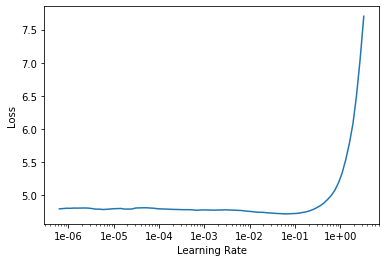

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.5)
learn.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,4.251603,4.017988,0.293578,05:40


In [0]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=10, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,4.001808,3.941348,0.301745,05:42
1,4.128095,4.060712,0.289842,05:42
2,4.214559,4.133401,0.282311,05:42
3,4.171031,4.105160,0.285697,05:43
4,4.107690,4.054721,0.290646,05:42
5,3.952753,3.991771,0.297385,05:43
6,3.815827,3.928691,0.304834,05:42
7,3.655516,3.889913,0.310102,05:42
8,3.498987,3.881652,0.312519,05:43
9,3.386326,3.888191,0.312559,05:42


In [0]:
# Save the fine-tuned encoder
learn.save_encoder('ft_enc')

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'train.csv', vocab=data_lm.train_ds.vocab,
                                       min_freq=1, bs=32)
data_clas.save()

In [0]:
learn = text_classifier_learner(data_clas, arch= AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


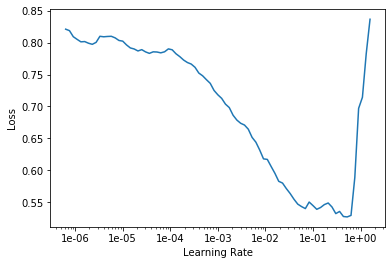

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.314346,0.229890,0.911200,04:21


In [0]:
learn.freeze_to(-2) 
learn.fit_one_cycle(1, slice(1e-3,1e-2), moms=(0.95,0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.304500,0.196820,0.920200,04:54


In [0]:
learn.freeze_to(-3) 
learn.fit_one_cycle(1, slice(8e-4,1e-2), moms=(0.95,0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.248752,0.181083,0.930800,04:23


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(8e-4,2e-2), moms=(0.95,0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.246294,0.183238,0.927400,04:22
1,0.210732,0.163227,0.933000,04:14
2,0.139298,0.155351,0.939800,04:04
3,0.089309,0.167842,0.944600,03:53


In [0]:
test = pd.read_csv(path/testfile, encoding='iso-8859-1')
test_pred = test.filter(['review','label'])
test_pred

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
9995,"A gritty Australian film, with all the element...",pos
9996,This movie gives you more of an idiea how Aust...,pos
9997,Before I start my review here is a quick lesso...,pos
9998,"A good story, well-acted with unexpected chara...",pos


In [0]:
test_pred['predicted label'] = test_pred['review'].apply(lambda row: str(learn.predict(row)[0]))
test_pred.head()

,review,label,predicted label
0,Once again Mr. Costner has dragged out a movie...,neg,neg
1,This is an example of why the majority of acti...,neg,neg
2,"First of all I hate those moronic rappers, who...",neg,neg
3,Not even the Beatles could write songs everyon...,neg,neg
4,Brass pictures (movies is not a fitting word f...,neg,pos


In [0]:
from sklearn.metrics import f1_score,accuracy_score
m1 = f1_score(test_pred['label'], test_pred['predicted label'], pos_label='pos')
m2 = accuracy_score(test_pred['label'], test_pred['predicted label'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.9318844954220745
Accuracy score: 0.9323


We can see that by utilising LSTM network in ULMFit, the accuracy score improves significantly from 0.88 to 0.93. But then, there are still some rooms for improvement and problems do exist in LSTM network too.


---


## What is the problem with LSTM?

The same problem that happens to RNNs generally, happen with LSTMs, i.e. when sentences are way too long LSTMs still don’t do well. The reason for that is that the probability of keeping the context from a word that is far away from the current word being processed decreases exponentially with the distance from it.That means that when sentences are long, the model often forgets the content of distant positions in the sequence. 

Another problem with RNNs, and LSTMs, is that it’s hard to parallelize the work for processing sentences, since you are have to process word by word. This results in training the model takes longer time and can't perform multiple actions simultaneously. Not only that but there is no explicit model of long and short range dependencies. 

Moving on, we will look at **attention** and **Convolutional Neural Networks (CNN)** on how they address and solve the issues faced by LSTMs and introducing the latest state-of-the-art neural network, **Transformers**! 

Reference: https://towardsdatascience.com/the-fall-of-rnn-lstm-2d1594c74ce0
 

---


## What is attention?

When translating a sentence, I pay special attention to the word I’m presently translating. When I’m transcribing an audio recording, I listen carefully to the segment I’m actively writing down. These are the examples of usage of attention in different scenario.

Neural networks can achieve this same behavior using attention, focusing on part of a subset of the information they are given. For RNNs, instead of only encoding the whole sentence in a hidden state, each word which has a corresponding hidden state is passed all the way to the decoding stage. Then, the hidden states are used at each step of the RNN to decode. The following video shows how that happens.

http://jalammar.github.io/images/seq2seq_7.mp4

The idea behind it is that there might be relevant information in every word in a sentence. So in order for the decoding to be precise, it needs to take into account every word of the input, using attention. 

Besides, the decoder does not directly use the hidden state provided by all encoders as input, but adopts a selection mechanism to select the hidden state that best matches the current position. To do so, it tries to determine which hidden state is most closely related to the current node by calculating the score value of each hidden state and doing a softmax calculation over the scores, which allows the higher correlation of the hidden state to have a larger fractional value, and the less relevant hidden state has a lower fractional value. It then multiples each hidden state by its softmaxed score, thus amplifying hidden states with high scores, and drowning out hidden states with low scores. This scoring exercise is done at each time step on the decoder side. Kindly refer to following videos on how it is done:

http://jalammar.github.io/images/attention_process.mp4

http://jalammar.github.io/images/attention_tensor_dance.mp4

Looking for more in depth explaination, kindly refer to http://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/. However, processing inputs (words) in parallel is still not possible. For a large corpus of text, this increases the time spent on processing the text. As result, Convolutional Neural Network is introduced to address this issue.


---


## Why Convolutional Neural Network (CNN)?

CNN enables parallelisation and thus greatly reduce the time spent in processing the inputs. Some of the most popular neural networks for sequence transduction, Wavenet and Bytenet, are CNN.

![alt text](https://miro.medium.com/max/713/1*www46FWqJCc3OZQKP_QRoQ.gif)

The reason why Convolutional Neural Networks can work in parallel, is that each word on the input can be processed at the same time and does not necessarily depend on the previous words to be translated. 

However, the problem is that CNN do not necessarily help with the problem of figuring out the problem of dependencies when translating sentences. That’s why **Transformers** were created, they are a combination of both CNN with attention.


---


## Transformers

Transformers try to solve the problems faced by LSTM by introducing CNN (for parallelisation purpose) together with attention models. Attention boosts the speed of how fast the model can translate from one sequence to another, more specifically, it uses self-attention (to be even more specific, it uses multihead attention). 

![alt text](https://miro.medium.com/max/1523/1*V2435M1u0tiSOz4nRBfl4g.png)

The Transformer consists of six encoders and six decoders. Each encoder and decoder are similar to other encoder and decoder. Encoder consists of two layers: Self-attention and a Feed Forward Neural Network.

![alt text](https://miro.medium.com/max/990/1*HaGTuYfNHWg45GZbTBnVSA.png)
![alt text](https://miro.medium.com/max/509/1*QcTbVCVPj4WFnqvvWU5-hQ.png)

The encoder’s inputs first flow through a self-attention layer. It helps the encoder look at other words in the input sentence as it encodes a specific word. The decoder has both those layers, but between them is an encoder-decoder attention layer that helps the decoder focus on relevant parts of the input sentence.


---


## What is Self-Attention?

Self-attention is similar to attention, they fundamentally share the same concept and many common mathematical operations.  In layman’s terms, the self-attention mechanism allows the inputs to interact with each other (“self”) and find out who they should pay more attention to (“attention”). The outputs are aggregates of these interactions and attention scores. Here is how it looks like in a sentence:

![alt text](https://miro.medium.com/max/1580/1*GQzYZuAMWr3lN_IACBfvAA.png)


---



## How Self-Attention works?

As is the case in NLP applications in general, we begin by turning each input word into a vector using an embedding algorithm. 

Each word is embedded into a vector of size 512 (can be changed). We’ll represent those vectors with these simple boxes.

![alt text](https://miro.medium.com/max/1030/0*0oTRj6MKAYEs_cT1.png)

In the bottom encoder that would be the word embeddings, but in other encoders, it would be the output of the encoder that’s directly below. After embedding the words in our input sequence, each of them flows through each of the two layers of the encoder. One key property of the Transformer, which is that the word in each position flows through its own path in the encoder. There are dependencies between these paths in the self-attention layer. The feed-forward layer does not have those dependencies, however, and thus the various paths can be executed in parallel while flowing through the feed-forward layer.

![alt text](https://miro.medium.com/max/1353/0*FVCP6TqLPQeWPZqt.png)





---


## Steps in calculating self-attention:

Self-attention can be generalised to compute a weighted sum of the values dependent on the query and the corresponding keys.
The query determines which values to focus on; we can say that the query ‘attends’ to the values. For example, when you type a query to search for some video on Youtube, the search engine will map your query against a set of keys (video title, description etc.) associated with candidate videos in the database, then present you the best matched videos (values).

![alt text](https://miro.medium.com/max/1094/0*-P9BdUe2FCSAIpxC.png)

1. Create three vectors from each of the encoder’s input vectors which are Query vector, Key vector and Value vector. These vectors are abstract vectors that extract different components of an input words and are created by multiplying the embedding by three matrices (the weight matrix) that we trained during the training process.


2. Calculate a score to determine how much focus to place on other parts of the input sentence as we encode a word at a certain position. Score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

![alt text](https://miro.medium.com/max/856/0*KlFsyIDK3O54l14X.png)


3.  Divide the scores by 8 (the square root of the dimension of the key vectors used here — 64. This leads to having more stable gradients. There could be other possible values here, but this is the default).


4. Pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1. Softmax score determines how much how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word.

![alt text](https://miro.medium.com/max/1084/0*rqWSBLDcJcbMmGs2.png)


5. Multiply each value vector by the softmax score. The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example).


6. Sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word). The resulting vector is one we can send along to the feed-forward neural network.

![alt text](https://miro.medium.com/max/983/0*ih2c_llIiOD1-aJN.png)

In the actual implementation, however, this calculation is done in matrix form for faster processing.


---


## Multihead attention

To make transformer even better, Transformers use the concept of Multihead attention. It expands the model’s ability to focus on different positions.  Yes, in the example above, z1 contains a little bit of every other encoding, but it could be dominated by the the actual word itself. It would be useful if we’re translating a sentence like “The animal didn’t cross the street because it was too tired”, we would want to know which word “it” refers to.

The idea behind it is that whenever you are translating a word, you may pay different attention to each word based on the type of question that you are asking. The images below show what that means. For example, whenever you are translating “kicked” in the sentence “I kicked the ball”, you may ask “Who kicked”. Depending on the answer, the translation of the word to another language can change. Or ask other questions, like “Did what?”

![alt text](https://miro.medium.com/max/1540/1*8H6TqcfHrtNCc9_Qva7xog.png)


## All-in-one visual showing how multihad attention works:


![alt text](http://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png)


---


## Positional Encoding

Another important step on the Transformer is to add positional encoding when encoding each word. Positional encoders are vector that gives context based on position of word in sentence. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word, or the distance between different words in the sequence. The intuition here is that adding these values to the embeddings provides meaningful distances between the embedding vectors once they’re projected into Q/K/V vectors and during dot-product attention.

![alt text](http://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png)


---

## Residual Connection and Layer Normalization

Each sub-layer (self-attention, ffnn) in each encoder is followed by a layer-normalization step and has a residual connection around it.

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm.png)

Normalization helps with the problem called internal covariate shift. Internal covariate shift refers to covariate shift occurring within a neural network, i.e. going from (say) layer 2 to layer 3. This happens because, as the network learns and the weights are updated, the distribution of outputs of a specific layer in the network changes. This forces the higher layers to adapt to that drift, which slows down learning. After normalizing the input in the neural network, we don’t have to worry about the scale of input features being extremely different.

To understand layer normalization, it is useful to contrast it with batch normalization. A mini-batch consists of multiple examples with the same number of features. Mini-batches are matrices — or tensors if each input is multi-dimensional — where one axis corresponds to the batch and the other axis — or axes — correspond to the feature dimensions. Batch normalization normalizes the input features across the batch dimension. The key feature of layer normalization is that it normalizes the inputs across the features. In batch normalization, the statistics are computed across the batch and are the same for each example in the batch. In contrast, in layer normalization, the statistics are computed across each feature and are independent of other examples. Layer normalization is better for the purpose of stabilization.

![alt text](https://miro.medium.com/max/1280/1*hex7_me89ax78PCv2zLTzA.png)

Besides, skip connections or residual connections are used to allow gradients to flow through a network directly, without passing through non-linear activation functions. Non-linear activation functions (eg: sigmoid and tanh), by nature of being non-linear, cause the gradients to explode or vanish (depending on the weights). Skip connections form conceptually a ‘bus’ which flows right the way through the network, and in reverse, the gradients can flow backwards along it too.

If we’re to visualize the vectors and the layer-norm operation associated with self attention, it would look like this:

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png)


---


## The Decoder Side

Now that we’ve covered most of the concepts on the encoder side, we basically know how the components of decoders work as well. But let’s take a look at how they work together.

![alt text](https://miro.medium.com/max/509/1*QcTbVCVPj4WFnqvvWU5-hQ.png)

The encoder start by processing the input sequence. The output of the top encoder is then transformed into a set of attention vectors K and V. These are to be used by each decoder in its “encoder-decoder attention” layer which helps the decoder focus on appropriate places in the input sequence:

![alt text](http://jalammar.github.io/images/t/transformer_decoding_1.gif)

The following steps repeat the process until a special symbol is reached indicating the transformer decoder has completed its output. The output of each step is fed to the bottom decoder in the next time step, and the decoders bubble up their decoding results just like the encoders did. And just like we did with the encoder inputs, we embed and add positional encoding to those decoder inputs to indicate the position of each word.

![alt text](http://jalammar.github.io/images/t/transformer_decoding_2.gif)

The self attention layers in the decoder operate in a slightly different way than the one in the encoder:

There is a masked multi-head attention at the bottom. Masked represents a mask that masks certain values so that they do not have an effect when the parameters are updated. There are two kinds of masks in the Transformer model — padding mask and sequence mask. The padding mask is used in all the scaled dot-product attention (query.key), and the sequence mask is only used in the decoder’s self-attention.

A padding mask solves the problem of input sequences being of variable length. Specifically, we pad 0 after a shorter sequence. But if the input sequence is too long, the content on the left is intercepted and the excess is discarded directly. Because the location of these fills (zeroes) is actually meaningless, our attention mechanism should not focus on these locations, so we need to do some processing. The specific approach is to add a very large negative number (negative infinity) to the values of these positions, so that the probability of these positions will be close to 0 after softmax! The padding mask is actually a tensor, each value is a Boolean, and the value of False is where we want to process.

A sequence mask is designed to ensure that the decoder is unable to see future information. That is, for a sequence, at time_step t, our decoded output should only depend on the output before t, not the output after t. This is specific to the Transformer architecture because we do not have RNNs where we can input our sequence sequentially. Here, we input everything together and if there were no mask, the multi-head attention would consider the whole decoder input sequence at each position. We achieve this by generating an upper triangular matrix with the values of the upper triangles all zero and applying this matrix to each sequence.

The “Encoder-Decoder Attention” layer works just like multiheaded self-attention, except it creates its Queries matrix from the layer below it, and takes the Keys and Values matrix from the output of the encoder stack

Another detail is that the the decoder input will be shifted to the right by one position. One reason to do this is that we do not want our model to learn how to copy our decoder input during training, but we want to learn that given the encoder sequence and a particular decoder sequence, which has been already seen by the model, we predict the next word/character. If we don’t shift the decoder sequence, the model learns to simply ‘copy’ the decoder input, since the target word/character for position i would be the word/character i in the decoder input. Thus, by shifting the decoder input by one position, our model needs to predict the target word/character for position i having only seen the word/characters 1, …, i-1 in the decoder sequence. This prevents our model from learning the copy/paste task. We fill the first position of the decoder input with a start-of-sentence token, since that place would otherwise be empty because of the right-shift. Similarly, we append an end-of-sentence token to the decoder input sequence to mark the end of that sequence and it is also appended to the target output sentence.


---


## The Final Linear and Softmax Layer

The decoder stack outputs a vector of floats. How do we turn that into a word? That’s the job of the final Linear layer which is followed by a Softmax Layer.

The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector.

Let’s assume that our model knows 10,000 unique English words (our model’s “output vocabulary”) that it’s learned from its training dataset. This would make the logits vector 10,000 cells wide – each cell corresponding to the score of a unique word. That is how we interpret the output of the model followed by the Linear layer.

The softmax layer then turns those scores into probabilities (all positive, all add up to 1.0). The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.

![alt text](http://jalammar.github.io/images/t/transformer_decoder_output_softmax.png)




---

## The model architecture of Transformer

Thus, after going through all the components in details, here is how a transformer looks like:

![alt_text](https://miro.medium.com/max/1800/1*BHzGVskWGS_3jEcYYi6miQ.png)


---


## Recap Of Training  

Now that we’ve covered the entire forward-pass process through a trained Transformer, it would be useful to glance at the intuition of training the model.

During training, an untrained model would go through the exact same forward pass. But since we are training it on a labeled training dataset, we can compare its output with the actual correct output.

To visualize this, let’s assume our output vocabulary only contains six words(“a”, “am”, “i”, “thanks”, “student”, and “<eos>” (short for ‘end of sentence’)).
    
![alt text](http://jalammar.github.io/images/t/vocabulary.png)

Once we define our output vocabulary, we can use a vector of the same width to indicate each word in our vocabulary. This also known as one-hot encoding. So for example, we can indicate the word “am” using the following vector:

![alt_text](http://jalammar.github.io/images/t/one-hot-vocabulary-example.png)

Following this recap, let’s discuss the model’s loss function – the metric we are optimizing during the training phase to lead up to a trained and hopefully amazingly accurate model.


---


## The Loss Function

Say we are training our model. Say it’s our first step in the training phase, and we’re training it on a simple example – translating “merci” into “thanks”.

What this means, is that we want the output to be a probability distribution indicating the word “thanks”. But since this model is not yet trained, that’s unlikely to happen just yet.

![alt_text](http://jalammar.github.io/images/t/transformer_logits_output_and_label.png)

Since the model's parameters (weights) are all initialized randomly, the (untrained) model produces a probability distribution with arbitrary values for each cell/word. We can compare it with the actual output, then tweak all the model's weights using backpropagation to make the output closer to the desired output.

But note that this is an oversimplified example. More realistically, we’ll use a sentence longer than one word. For example – input: “je suis étudiant” and expected output: “i am a student”. What this really means, is that we want our model to successively output probability distributions where:

a. Each probability distribution is represented by a vector of width vocab_size (6 in our toy example, but more realistically a number like 3,000 or 10,000)

b. The first probability distribution has the highest probability at the cell associated with the word “i”

c. The second probability distribution has the highest probability at the cell associated with the word “am”

d. And so on, until the fifth output distribution indicates ‘<end of sentence>’ symbol, which also has a cell associated with it from the 10,000 element vocabulary.

![alt text](http://jalammar.github.io/images/t/output_target_probability_distributions.png)

After training the model for enough time on a large enough dataset, we would hope the produced probability distributions would look like this:

![alt text](http://jalammar.github.io/images/t/output_trained_model_probability_distributions.png)

Now, because the model produces the outputs one at a time, we can assume that the model is selecting the word with the highest probability from that probability distribution and throwing away the rest. That’s one way to do it (called greedy decoding). 

Another way to do it would be to hold on to, say, the top two words with highest probabilities (say, ‘I’ and ‘a’ for example), then in the next step, run the model twice: once assuming the first output position was the word ‘I’, and another time assuming the first output position was the word ‘a’, and whichever version produced less error considering both positions #1 and #2 is kept. We repeat this for positions #2 and #3…etc. This method is called “beam search”, where in our example, beam_size was two (because we compared the results after calculating the beams for positions #1 and #2), and top_beams is also two (since we kept two words). These are both hyperparameters that you can experiment with.




Reference: 
1. https://towardsdatascience.com/transformers-141e32e69591

2. http://jalammar.github.io/illustrated-transformer/

3. http://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/

4. https://towardsdatascience.com/breaking-bert-down-430461f60efb



















---


# 2. Bidirectional Encoder Representations from Transformers (BERT)

BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. A language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models.

## How BERT is built?

BERT is basically a trained Transformer Encoder stack. BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form,Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary. 

As opposed to directional models, which read the text input sequentially (left-to-right or right-to-left), the Transformer encoder reads the entire sequence of words at once. Therefore it is considered bidirectional, though it would be more accurate to say that it’s non-directional. This characteristic allows the model to learn the context of a word based on all of its surroundings (left and right of the word).

To overcome the challenge of bidirectional in which it allows each word to indirectly see itself in a multi-layered context, BERT uses two training strategies:

### 1. Masked Language Model (MLM)
    
Language Modeling is the task of predicting the next word given a sequence of words. In masked language modeling instead of predicting every next token, a percentage of input tokens is masked at random and only those masked tokens are predicted.
    
Why? Bi-directional models are more powerful than uni-directional language models. But in a multi-layered model bi-directional models do not work because the lower layers leak information and allow a token to see itself in later layers.
    
   The masked words are not always replaced with the masked token – [MASK] because then the masked tokens would never be seen before fine-tuning. Therefore, 15% of the tokens are chosen at random and 

   a. 80% of the time tokens are actually replaced with the token [MASK].
    
   b. 10% of the time tokens are replaced with a random token.
    
   c. 10% of the time tokens are left unchanged. 
    
The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence. In technical terms, the prediction of the output words requires:

   a. Adding a classification layer on top of the encoder output.
    
   b. Multiplying the output vectors by the embedding matrix, transforming them into the vocabulary dimension.
    
   c. Calculating the probability of each word in the vocabulary with softmax.

![alt text](https://miro.medium.com/max/1095/0*ViwaI3Vvbnd-CJSQ.png)

### 2. Next Sentence Prediction (NSP)

In the BERT training process, the model receives pairs of sentences as input and learns to predict if the second sentence in the pair is the subsequent sentence in the original document. During training, 50% of the inputs are a pair in which the second sentence is the subsequent sentence in the original document, while in the other 50% a random sentence from the corpus is chosen as the second sentence. The assumption is that the random sentence will be disconnected from the first sentence.
    
This task can be easily generated from any monolingual corpus. It is helpful because many downstream tasks such as Question and Answering and Natural Language Inference require an understanding of the relationship between two sentences.

To help the model distinguish between the two sentences in training, the input is processed in the following way before entering the model:

   a. A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.

   b. A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.

   c. A positional embedding is added to each token to indicate its position in the sequence.

![alt text](https://miro.medium.com/max/1468/0*m_kXt3uqZH9e7H4w.png)

To predict if the second sentence is indeed connected to the first, the following steps are performed:

a. The entire input sequence goes through the Transformer model.

b. The output of the [CLS] token is transformed into a 2×1 shaped vector, using a simple classification layer (learned matrices of weights and biases).
  
c. Calculating the probability of IsNextSequence with softmax.

When training the BERT model, Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies.


---


## Some Facts about BERT

1. WHAT IS THE MAXIMUM SEQUENCE LENGTH OF THE INPUT?

    512 tokens.


2. HOW MANY LAYERS ARE FROZEN IN THE FINE-TUNING STEP?
    
    No layers are frozen during fine-tuning. All the pre-trained layers along with the task-specific parameters are trained simultaneously.


3. IS DISCRIMINATIVE FINE-TUNING USED?
    
    No. All the parameters are tuned with the same learning rate.


4. WHAT ARE THE OPTIMAL VALUES OF THE HYPERPARAMETERS USED IN FINE-TUNING?

    The optimal hyperparameter values are task-specific. But, the authors found that the following range of values works well across all tasks –

    Dropout – 0.1
    Batch Size – 16, 32
    Learning Rate (Adam) – 5e-5, 3e-5, 2e-5
    Number of epochs – 3, 4
    
    The authors also observed that large datasets (> 100k labeled samples) are less sensitive to hyperparameter choice than smaller datasets.

---


## Steps in utilising BERT for text classification problem:

1. Tokenization

    a. Use the BERT tokenizer to first split the word into tokens. 
    
    b. add the special tokens needed for sentence classifications (these are [CLS] at the first position, and [SEP] at the end of the sentence). 

    c. Replace each token with its id from the embedding table which is a component we get with the trained model.

![alt text](http://jalammar.github.io/images/distilBERT/bert-distilbert-tokenization-2-token-ids.png)

2. Flow through the BERT model

    a. The output would be a vector for each input token. each vector is made up of 768 numbers (floats).

    b. We ignore all except the first vector (the one associated with the [CLS] token). The one vector we pass as the input to the logistic regression model. (p.s: BERT was trained using a next sentence prediction (NSP) objective using the [CLS] token as a sequence approximate. The user may use this token (the first token in a sequence built with special tokens) to get a sequence prediction rather than a token prediction. However, averaging over the sequence may yield better results than using the [CLS] token.)

![alt text](http://jalammar.github.io/images/distilBERT/bert-model-calssification-output-vector-cls.png)

## How to process the output of BERT?

The output for BERT looks like something as below:

![alt text](http://jalammar.github.io/images/distilBERT/bert-output-tensor.png)

For sentence classification, we’re only interested in BERT’s output for the [CLS] token, so we select that slice of the cube and discard everything else.  We slice that 3d tensor to get the 2d tensor .

![alt text](http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png)

And now features is a 2d numpy array containing the sentence embeddings of all the sentences in our dataset. Each row corresponds to a sentence in our dataset, each column corresponds to the output of a hidden unit from the feed-forward neural network at the top transformer block of the Bert/DistilBERT model. Afterwards, we use this output to train Logistic Regression.

![alt text](http://jalammar.github.io/images/distilBERT/bert-output-cls-senteence-embeddings.png)


Reference:
1. https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

2. http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

3. https://huggingface.co/transformers/index.html

4. https://yashuseth.blog/2019/06/12/bert-explained-faqs-understand-bert-working/

In [0]:
!pip install transformers
!pip install tensorflow==2.1.0

     |████████████████████████████████| 501kB 2.8MB/s 
     |████████████████████████████████| 3.7MB 42.4MB/s 
     |████████████████████████████████| 1.0MB 32.4MB/s 
     |████████████████████████████████| 870kB 36.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=9bd7870baf19a141e4c3a7b60cddc002201f0a1cf029ed4ecf8c1933f4396c31
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [0]:
imdb_df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
imdb_df.columns=['review','label']
imdb_df

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [0]:
#BERT model:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
tokenized = imdb_df['review'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized

0       [101, 1037, 18385, 1010, 6057, 1998, 2633, 182...
1       [101, 4593, 2128, 27241, 23931, 2013, 1996, 62...
2       [101, 2027, 3653, 23545, 2037, 4378, 24185, 10...
3       [101, 2023, 2003, 1037, 17453, 14726, 19379, 1...
4       [101, 5655, 6262, 1005, 1055, 12075, 2571, 376...
                              ...                        
6915    [101, 9145, 1010, 7570, 18752, 14116, 1998, 28...
6916    [101, 2202, 2729, 2003, 19957, 2864, 2011, 103...
6917    [101, 1996, 5896, 4472, 4121, 1010, 3082, 7832...
6918    [101, 1037, 5667, 2919, 2143, 2007, 5667, 2561...
6919    [101, 1037, 12090, 2135, 2512, 5054, 19570, 23...
Name: review, Length: 6920, dtype: object

In [0]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded

array([[  101,  1037, 18385, ...,     0,     0,     0],
       [  101,  4593,  2128, ...,     0,     0,     0],
       [  101,  2027,  3653, ...,     0,     0,     0],
       ...,
       [  101,  1996,  5896, ...,     0,     0,     0],
       [  101,  1037,  5667, ...,     0,     0,     0],
       [  101,  1037, 12090, ...,     0,     0,     0]])

In [0]:
 tokenized.values

In [0]:
np.array(padded).shape

(6920, 67)

In [0]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(6920, 67)

In [0]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [0]:
features = last_hidden_states[0][:,0,:].numpy()
features

array([[-0.5566489 , -0.33129248, -0.22280605, ..., -0.2278613 ,
         0.6319193 ,  0.24306667],
       [-0.28789303, -0.14285529, -0.06857958, ..., -0.3169057 ,
         0.18455243,  0.31989798],
       [-0.18645282,  0.30229506, -0.1851117 , ..., -0.33492973,
         0.9848733 ,  0.5297744 ],
       ...,
       [-0.10313716,  0.2779548 , -0.4585574 , ...,  0.06911813,
         0.7822481 ,  0.57749933],
       [-0.3023639 , -0.15445913, -0.18571426, ..., -0.1518047 ,
         0.72149014,  0.09804447],
       [ 0.07386179, -0.17063335, -0.03027165, ..., -0.12601517,
         0.46106923,  0.20001677]], dtype=float32)

In [0]:
labels = imdb_df['label']
train_features, test_features, train_labels,  test_labels = train_test_split(features, labels)

In [0]:
# parameters = {'C': np.linspace(0.0001, 100, 20)}
# grid_search = GridSearchCV(LogisticRegression(), parameters)
# grid_search.fit(train_features, train_labels)

# print('best parameters: ', grid_search.best_params_)
# print('best scores: ', grid_search.best_score_)

In [0]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr.score(test_features, test_labels)

0.8583815028901735

---

## Transformer Pipelines
In transformers v2.3.0, **pipelines** provides a high-level, easy to use, API for doing inference over a variety of downstream-tasks, including:

1. Sentence Classification (Sentiment Analysis): Indicate if the overall sentence is either positive or negative. (Binary Classification task or Logitic Regression task)

2. Token Classification (Named Entity Recognition, Part-of-Speech tagging): For each sub-entities (tokens) in the input, assign them a label (Classification task).

3. Question-Answering: Provided a tuple (question, context) the model should find the span of text in content answering the question.

4. Mask-Filling: Suggests possible word(s) to fill the masked input with respect to the provided context.
5. Feature Extraction: Maps the input to a higher, multi-dimensional space learned from the data.

Pipelines encapsulate the overall process of every NLP process:

1. Tokenization: Split the initial input into multiple sub-entities with ... properties (i.e. tokens).

2. Inference: Maps every tokens into a more meaningful representation.

3. Decoding: Use the above representation to generate and/or extract the final output for the underlying task.


In [0]:
from transformers import pipeline
import pandas as pd

nlp = pipeline('sentiment-analysis')
nlp('This movie was kind of boring.')

[{'label': 'NEGATIVE', 'score': 0.99974006}]